In [1]:
import pandas as pd
import requests
import json
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import time

In [40]:
import altair as alt
from vega_datasets import data

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<b>TEPCO Usage API</b><br>
https://tepco-usage-api.appspot.com/

In [4]:
usage_df = pd.DataFrame()

In [5]:
def get_usage_data(yyyymm):
    url = f"http://tepco-usage-api.appspot.com/{yyyymm}.json"
    r = requests.get(url)
    data = r.json()
    df = pd.concat([usage_df, pd.DataFrame(data)], ignore_index=True)
    time.sleep(1)
    return df

In [6]:
#period of time API
months = pd.date_range(start='2011/3/1', end=date.today()+relativedelta(months=1), freq="M").strftime('%Y/%m')

In [7]:
#Just for 1st time
#for month in months:
#    usage_df = get_usage_data(month)

#usage_df.to_csv('electricity_usage.csv',index=False)

In [8]:
usage_df = pd.read_csv('electricity_usage.csv')

In [9]:
usage_df

capacity_updated  forecast_peak_usage  month  forecast_peak_period  \
0      2011-03-22 16:05:00                  NaN      3                   NaN   
1      2011-03-22 16:05:00                  NaN      3                   NaN   
2      2011-03-22 16:05:00                  NaN      3                   NaN   
3      2011-03-22 16:05:00                  NaN      3                   NaN   
4      2011-03-22 16:05:00                  NaN      3                   NaN   
...                    ...                  ...    ...                   ...   
96477  2012-06-29 09:20:00               5619.0      6                  14.0   
96478  2012-06-29 09:20:00               5619.0      6                  14.0   
96479  2012-06-29 09:20:00               5619.0      6                  14.0   
96480  2012-06-29 09:20:00               5619.0      6                  14.0   
96481  2012-06-29 09:20:00               5619.0      6                  14.0   

       capacity_peak_period  year  saving  day  capacity  hour  \
0                       NaN  2011   False   23      3750     0   
1                       NaN  2011   False   23      3750     1   
2                       NaN  2011   False   23      3750     2   
3                       NaN  2011   False   23      3750     3   
4                       NaN  2011   False   23      3750     4   
...                     ...   ...     ...  ...       ...   ...   
96477                  14.0  2022   False   30      5806     0   
96478                  14.0  2022   False   30      5806     1   
96479                  14.0  2022   False   30      5806     2   
96480                  14.0  2022   False   30      5806     3   
96481                  14.0  2022   False   30      5806     4   

      forecast_peak_updated  forecast        usage_updated  \
0                       NaN       NaN  2011-03-22 17:05:25   
1                       NaN       NaN  2011-03-22 17:05:25   
2                       NaN       NaN  2011-03-22 18:05:25   
3                       NaN       NaN  2011-03-22 19:05:25   
4                       NaN       NaN  2011-03-22 20:30:26   
...                     ...       ...                  ...   
96477   2012-06-29 09:20:00       0.0  2022-06-29 16:05:03   
96478   2012-06-29 09:20:00       0.0  2022-06-29 17:05:03   
96479   2012-06-29 09:20:00       0.0  2022-06-29 18:05:03   
96480   2012-06-29 09:20:00       0.0  2022-06-29 19:05:04   
96481   2012-06-29 09:20:00       0.0  2022-06-29 20:05:02   

                  entryfor  usage  
0      2011-03-22 15:00:00   2770  
1      2011-03-22 16:00:00   2630  
2      2011-03-22 17:00:00   2560  
3      2011-03-22 18:00:00   2500  
4      2011-03-22 19:00:00   2500  
...                    ...    ...  
96477  2022-06-29 15:00:00   3128  
96478  2022-06-29 16:00:00   2897  
96479  2022-06-29 17:00:00   2794  
96480  2022-06-29 18:00:00   2758  
96481  2022-06-29 19:00:00   2744  

[96482 rows x 15 columns]

In [10]:
usage_df.dtypes

capacity_updated          object
forecast_peak_usage      float64
month                      int64
forecast_peak_period     float64
capacity_peak_period     float64
year                       int64
saving                      bool
day                        int64
capacity                   int64
hour                       int64
forecast_peak_updated     object
forecast                 float64
usage_updated             object
entryfor                  object
usage                      int64
dtype: object

In [11]:
#entryfor: UTC--->JST(+9)
utc_columns = ['entryfor','capacity_updated','forecast_peak_updated','usage_updated']

for column in utc_columns:
    usage_df[column] = pd.to_datetime(usage_df[column]) + timedelta(hours=9)

In [12]:
usage_df.capacity.unique()

array([3750, 3850, 3700, ..., 5517, 5720, 5806])

<AxesSubplot:xlabel='entryfor'>

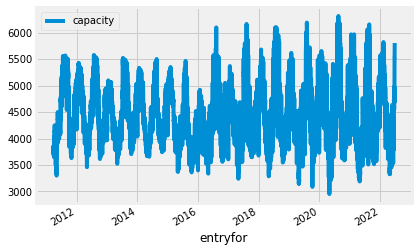

In [13]:
usage_df.plot(x='entryfor', y='capacity')

<AxesSubplot:xlabel='entryfor'>

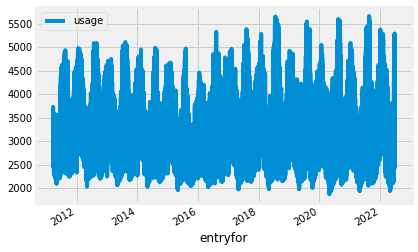

In [14]:
usage_df.plot(x='entryfor', y='usage')

In [15]:
usage_df['usage_pct'] = (usage_df.usage / usage_df.capacity * 100)

<AxesSubplot:xlabel='entryfor'>

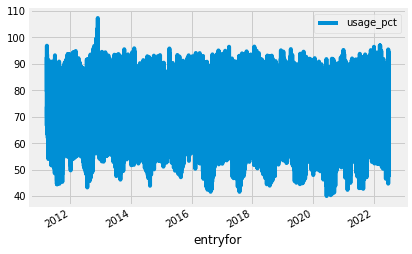

In [16]:
usage_df.plot(x='entryfor', y='usage_pct')

<AxesSubplot:xlabel='entryfor'>

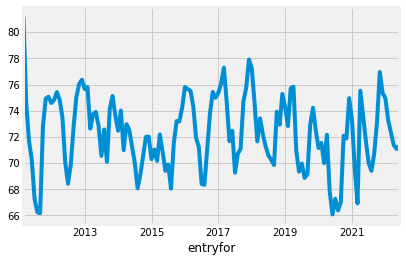

In [17]:
usage_df.resample('M', on='entryfor').usage_pct.mean().plot()

In [18]:
june = usage_df[usage_df.entryfor.dt.month==6]
july = usage_df[usage_df.entryfor.dt.month==7]
august = usage_df[usage_df.entryfor.dt.month==8]

<AxesSubplot:xlabel='entryfor'>

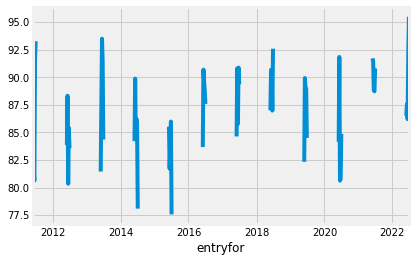

In [19]:
june.resample('W', on='entryfor').usage_pct.max().plot()

<AxesSubplot:xlabel='entryfor'>

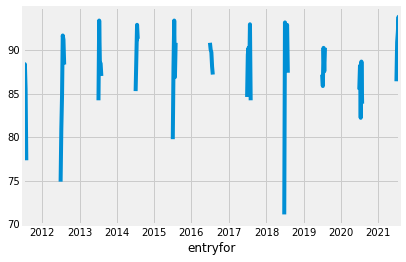

In [20]:
july.resample('W', on='entryfor').usage_pct.max().plot()

<AxesSubplot:xlabel='entryfor'>

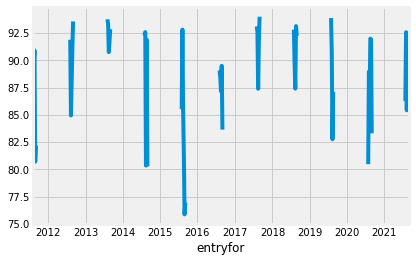

In [21]:
august.resample('W', on='entryfor').usage_pct.max().plot()

In [85]:
source = june.iloc[-5000:]

alt.Chart(source).transform_density(
    'usage_pct',
    as_=['usage_pct', 'density'],
    extent=[35, 110],
    groupby=['year']
).mark_area(orient='horizontal').encode(
    y='usage_pct:Q',
    color='year:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'year:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

alt.Chart(...)

0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
4043    2022
4044    2022
4045    2022
4046    2022
4047    2022
Name: entryfor, Length: 4048, dtype: int64

In [219]:
#source = june.iloc[-5000:]
source = june.resample('D', on='entryfor').usage_pct.max().reset_index()
source['year'] = source.entryfor.dt.year

stripplot =  alt.Chart(source, width=40).mark_circle(size=8).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=False, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y(
        'usage_pct:Q',
        scale=alt.Scale(domain=(60, 100)),
    ),
    color=alt.Color('year:N', legend=None),
    column=alt.Column(
        'year:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='top',
            labelAlign='right',
            labelPadding=3,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

In [94]:
source = june.iloc[-5000:]

alt.Chart(source).mark_point().encode(
    x='year:N',
    y=alt.Y(
        'usage_pct:Q',
         scale=alt.Scale(domain=(35, 100))
    ),
    color='year:N'
).configure_axis(
    grid=False
)

alt.Chart(...)

<AxesSubplot:xlabel='entryfor'>

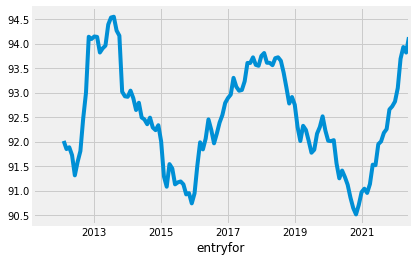

In [185]:
usage_df.resample('M', on='entryfor').usage_pct.max().rolling(12).mean().plot()

<AxesSubplot:xlabel='entryfor'>

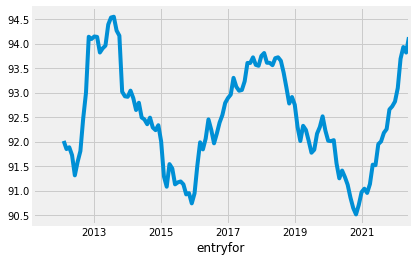

In [190]:
usage_df.resample('M', on='entryfor').usage_pct.max().rolling(12).mean().plot()

In [199]:
freq = 'M'
rolling_months = 12

source = usage_df.resample(freq, on='entryfor').usage_pct.mean().to_frame()
source['min'] = usage_df.resample(freq, on='entryfor').usage_pct.min()
source['max'] = usage_df.resample(freq, on='entryfor').usage_pct.max()

source = source.rolling(rolling_months).mean().dropna(how='all')
source = source.rename_axis('date').reset_index()
source

date  usage_pct        min        max
0   2012-02-29  72.462128  51.601376  92.017634
1   2012-03-31  71.982868  50.874688  91.851522
2   2012-04-30  72.006766  51.009202  91.888205
3   2012-05-31  72.157963  51.285373  91.727107
4   2012-06-30  72.143824  51.441269  91.315124
..         ...        ...        ...        ...
120 2022-02-28  72.629698  49.201777  93.098790
121 2022-03-31  73.081099  49.793865  93.696541
122 2022-04-30  72.735327  49.570088  93.935800
123 2022-05-31  72.526302  49.073507  93.822570
124 2022-06-30  72.493459  48.852060  94.136696

[125 rows x 4 columns]

In [207]:
line = alt.Chart(source).mark_line(
    color='red'
).encode(
    x='date:T',
    y='usage_pct'
)

band = alt.Chart(source).mark_area(
    opacity=0.5, color='pink'
).encode(
    x='date:T',
    y='min',
    y2='max'
)

band + line

alt.LayerChart(...)